#  영국시장의 중고 자동차 가격 데이터 다루기

## 중고차 가격 데이터

이번 프로젝트에서는 "중고차 가격 예측 모델"을 가정하여 데이터를 준비해볼 수도 있고, "중고차 특성에 따른 클러스터링"을 가정하여 데이터를 준비해볼 수도 있습니다.
아직 머신러닝 알고리즘을 학습하기 전 단계이니, 배웠던 내용을 최대한 활용하여 다양하게 데이터를 변환해보세요.

### data road & check

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

car_df = pd.read_csv('../../data/cars.csv')
brand_df = pd.read_csv('../../data/brand.csv')

display(car_df.head())
display(brand_df.head())

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


### car_df + brand_df

In [2]:
car_df['brand'] = car_df['title'].str.split().str[0].str.lower()
brand_df.rename(columns={'title': 'brand'}, inplace=True)

merged_df = pd.merge(car_df, brand_df, on='brand', how='left')
merged_df

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,skoda,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,vauxhall,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,hyundai,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,mini,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,vauxhall,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,RENAULT MEGANE,1395,76202,2006,4.0,Petrol,Hatchback,1.6L,Manual,5.0,5.0,Euro 4,NaN,renault,France
3683,AUDI A4,6990,119000,2012,NaN,Petrol,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,audi,Germany
3684,BMW 3 SERIES,3995,139000,2013,NaN,Diesel,Saloon,2.0L,Manual,4.0,5.0,Euro 5,NaN,bmw,Germany
3685,HONDA ACCORD,1390,179190,2007,NaN,Diesel,Estate,2.2L,Manual,5.0,5.0,Euro 4,Full,honda,Japan


In [3]:
bonus_df = merged_df.copy()

### 카테고리형 변수를 숫자 형태로 변환하기

In [4]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   Price              3687 non-null   int64  
 2   Mileage(miles)     3687 non-null   int64  
 3   Registration_Year  3687 non-null   int64  
 4   Previous Owners    2276 non-null   float64
 5   Fuel type          3687 non-null   object 
 6   Body type          3687 non-null   object 
 7   Engine             3642 non-null   object 
 8   Gearbox            3687 non-null   object 
 9   Doors              3662 non-null   float64
 10  Seats              3652 non-null   float64
 11  Emission Class     3600 non-null   object 
 12  Service history    540 non-null    object 
 13  brand              3687 non-null   object 
 14  country            3687 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 460.9+ KB


In [5]:
merged_df['Engine'] = merged_df['Engine'].str.replace('L', '', regex=False).astype(float)
merged_df['Emission Class'] = merged_df['Emission Class'].str.extract('(\d+)').astype(float)

In [6]:
merged_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3642.000000,3662.000000,3652.000000,3600.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,1.606260,4.321409,4.900329,4.910000
std,4480.629885,3.941718e+04,5.082387,1.546028,0.486584,0.986760,0.577046,0.910688
min,400.000000,1.000000e+00,1953.000000,1.000000,0.800000,2.000000,2.000000,1.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,1.300000,3.000000,5.000000,4.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,1.600000,5.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,1.900000,5.000000,5.000000,6.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,6.300000,5.000000,7.000000,6.000000


### 결측치 제거

In [7]:
merged_df.isna().mean()

title                0.000000
Price                0.000000
Mileage(miles)       0.000000
Registration_Year    0.000000
Previous Owners      0.382696
Fuel type            0.000000
Body type            0.000000
Engine               0.012205
Gearbox              0.000000
Doors                0.006781
Seats                0.009493
Emission Class       0.023596
Service history      0.853539
brand                0.000000
country              0.000000
dtype: float64

In [8]:
merged_df['Service history'] = merged_df['Service history'].fillna('Unknown')

In [9]:
merged_df['na_values'] = merged_df.isna().sum(axis=1)
merged_df = merged_df[merged_df['na_values'] < 4]
merged_df.drop('na_values', axis=1, inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


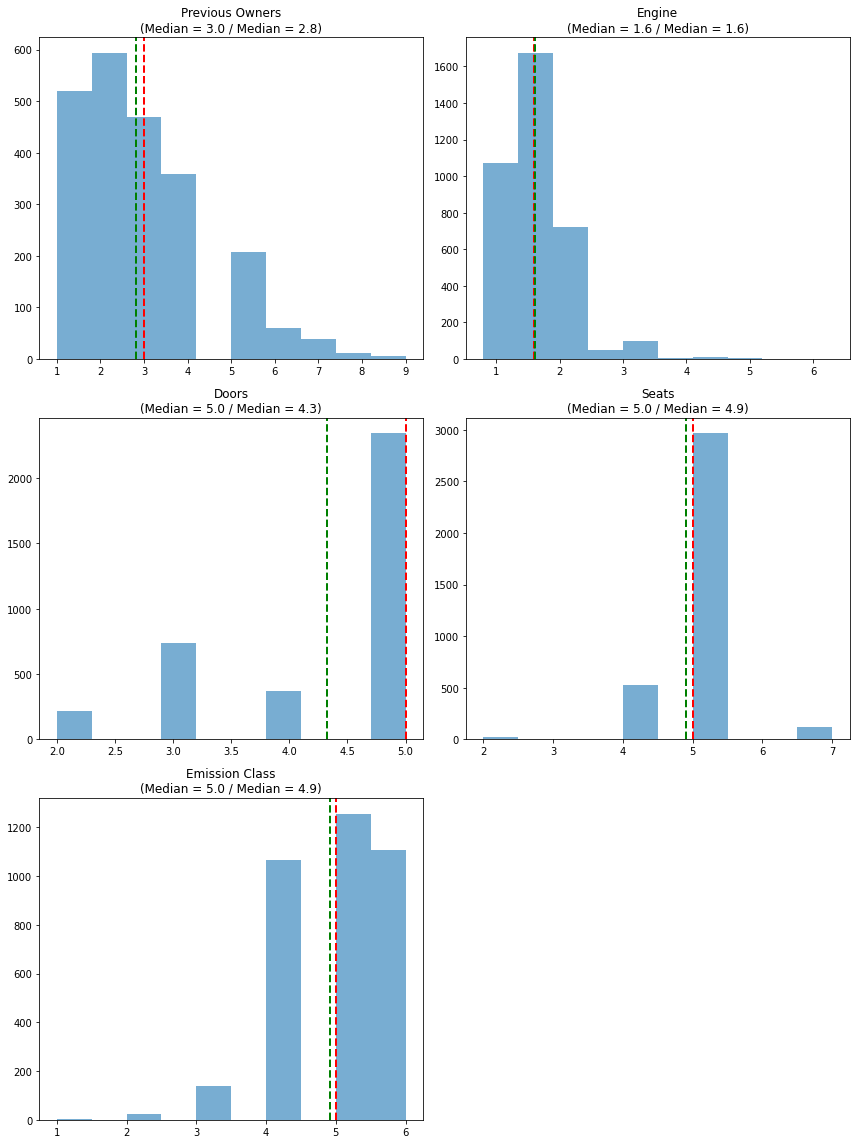

In [10]:
numeric_cols = ['Previous Owners', 'Engine', 'Doors', 'Seats', 'Emission Class']
median_values = merged_df[numeric_cols].median()
mean_values = merged_df[numeric_cols].mean()

plt.figure(figsize=(12, 16))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot((len(numeric_cols)+2-1)//2, 2, i)
    plt.hist(merged_df[col].dropna(), alpha=0.6)
    plt.axvline(median_values[col], color='red', linestyle='dashed', linewidth=2)
    plt.axvline(mean_values[col], color='green', linestyle='dashed', linewidth=2)
    plt.title(f"{col}\n(Median = {median_values[col]} / Median = {mean_values[col]:.1f})", fontsize=12)
plt.tight_layout()
plt.show()

In [11]:
merged_df[numeric_cols] = merged_df[numeric_cols].fillna(median_values)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [12]:
merged_df.isna().sum()

title                0
Price                0
Mileage(miles)       0
Registration_Year    0
Previous Owners      0
Fuel type            0
Body type            0
Engine               0
Gearbox              0
Doors                0
Seats                0
Emission Class       0
Service history      0
brand                0
country              0
dtype: int64

### 이상치 제거

In [13]:
merged_df.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class
count,3674.000000,3.674000e+03,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000,3674.000000
mean,5788.852477,8.134587e+04,2011.847305,2.882145,1.606097,4.323625,4.900925,4.911813
std,4486.599984,3.943769e+04,5.083173,1.219004,0.484326,0.985908,0.575367,0.901556
min,400.000000,1.000000e+00,1953.000000,1.000000,0.800000,2.000000,2.000000,1.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,1.300000,3.000000,5.000000,4.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,1.600000,5.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2016.000000,3.000000,1.900000,5.000000,5.000000,6.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,6.300000,5.000000,7.000000,6.000000


In [14]:
merged_df['Price'].sort_values()

3245      400
3278      450
1238      495
3246      499
3429      500
        ...  
3102    25995
3230    25995
3224    28240
2936    30000
3212    33900
Name: Price, Length: 3674, dtype: int64

In [15]:
merged_df['Mileage(miles)'].sort_values()

3219          1
3100          1
2013          6
3102        222
2760       1048
         ...   
1259     274100
1283     274100
2048     274100
1946     274100
1037    1110100
Name: Mileage(miles), Length: 3674, dtype: int64

In [16]:
merged_df[merged_df['Mileage(miles)'] < 1000]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
2013,MG ZT,15500,6,2004,4.0,Petrol,Saloon,1.8,Manual,4.0,5.0,3.0,Unknown,mg,United Kingdom
3100,MG MG ZS,18365,1,2023,3.0,Petrol,SUV,1.5,Manual,5.0,5.0,6.0,Unknown,mg,United Kingdom
3102,SEAT ATECA,25995,222,2023,3.0,Petrol,SUV,1.5,Manual,5.0,5.0,6.0,Unknown,seat,Spain
3219,MG MG ZS,18515,1,2023,3.0,Petrol,SUV,1.5,Manual,5.0,5.0,6.0,Unknown,mg,United Kingdom


In [17]:
merged_df = merged_df[merged_df['Mileage(miles)'] >= 1000]

In [18]:
merged_df['Registration_Year'].sort_values()

3024    1953
237     1972
2375    1981
1239    1985
1353    1987
        ... 
3140    2022
2760    2023
3173    2023
2967    2023
8       2025
Name: Registration_Year, Length: 3670, dtype: int64

In [19]:
merged_df = merged_df[merged_df['Registration_Year'] < 2025]

In [20]:
merged_df['Previous Owners'].sort_values()

1949    1.0
530     1.0
3134    1.0
3133    1.0
3130    1.0
       ... 
1314    9.0
404     9.0
3463    9.0
212     9.0
3331    9.0
Name: Previous Owners, Length: 3669, dtype: float64

In [21]:
merged_df[merged_df['Previous Owners'] == 9]

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
212,VAUXHALL CORSA,1500,96270,2008,9.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,4.0,Unknown,vauxhall,United Kingdom
404,BMW 3 SERIES,2500,138910,2003,9.0,Petrol,Convertible,2.5,Manual,2.0,4.0,3.0,Unknown,bmw,Germany
1314,MINI HATCH,1875,98710,2007,9.0,Petrol,Hatchback,1.6,Manual,3.0,4.0,4.0,Unknown,mini,United Kingdom
3331,PEUGEOT 207 SW,895,114312,2008,9.0,Petrol,Estate,1.4,Manual,5.0,5.0,4.0,Unknown,peugeot,France
3463,PEUGEOT 207 SW,1450,115000,2009,9.0,Petrol,Estate,1.4,Manual,5.0,5.0,4.0,Unknown,peugeot,France


In [22]:
merged_df.groupby('brand')['Price'].agg(['mean','std']).sort_values(by='mean', ascending=False)

,mean,std
brand,,
lagonda,14995.000000,NaN
ds,14293.833333,7117.793490
maserati,13300.000000,3044.667470
marcos,11495.000000,NaN
abarth,11216.333333,6039.482621
land,10741.428571,7919.428085
jaguar,8680.766667,4615.343456
ssangyong,8636.000000,6164.556918
infiniti,8625.714286,1925.935419


In [23]:
pd.pivot_table(merged_df, index='brand', columns='Fuel type', values='Price')

Fuel type,Diesel,Diesel Hybrid,Electric,Petrol,Petrol Hybrid,Petrol Plug-in Hybrid
brand,,,,,,
abarth,NaN,NaN,NaN,11216.333333,NaN,NaN
alfa,4214.666667,NaN,NaN,2688.750000,NaN,NaN
audi,8731.301205,NaN,NaN,6386.555556,NaN,NaN
bmw,7342.022222,23220.0,NaN,7058.486239,NaN,19460.652174
chevrolet,5249.500000,NaN,NaN,3012.000000,NaN,NaN
chrysler,NaN,NaN,NaN,2433.800000,NaN,NaN
citroen,4026.891892,NaN,NaN,5052.206897,NaN,NaN
dacia,6754.600000,NaN,NaN,7820.111111,NaN,NaN
daewoo,NaN,NaN,NaN,995.000000,NaN,NaN


In [24]:
merged_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,skoda,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,vauxhall,United Kingdom
2,HYUNDAI I30,949,137000,2011,3.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,hyundai,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,mini,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,3.0,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,vauxhall,United Kingdom


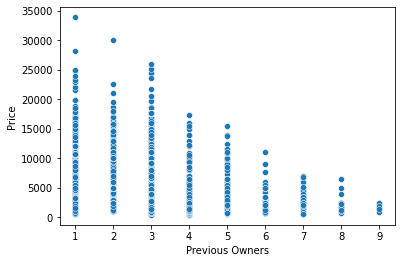

In [25]:
sns.scatterplot(x=merged_df['Previous Owners'], y=merged_df['Price']);

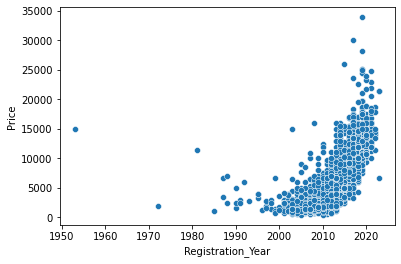

In [26]:
sns.scatterplot(x=merged_df['Registration_Year'], y=merged_df['Price']);

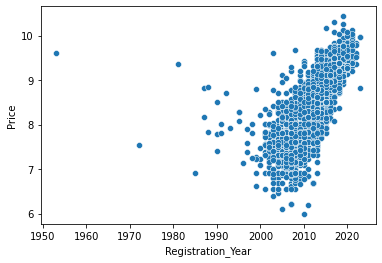

In [27]:
sns.scatterplot(x=merged_df['Registration_Year'], y=np.log(merged_df['Price']));

### scaler 활용하기

In [28]:
merged_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,brand,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown,skoda,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2,Manual,3.0,5.0,4.0,Full,vauxhall,United Kingdom
2,HYUNDAI I30,949,137000,2011,3.0,Petrol,Hatchback,1.4,Manual,5.0,5.0,5.0,Unknown,hyundai,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4,Manual,3.0,4.0,4.0,Full,mini,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,3.0,Diesel,Hatchback,1.3,Manual,5.0,5.0,5.0,Unknown,vauxhall,United Kingdom


In [29]:
merged_df[['title','Fuel type','Body type','Gearbox','Emission Class','Service history','brand','country']].nunique()

title              448
Fuel type            6
Body type           10
Gearbox              2
Emission Class       6
Service history      2
brand               48
country             12
dtype: int64

In [30]:
merged_df.drop('title', axis = 1, inplace = True)

In [31]:
merged_df['brand'].value_counts()

vauxhall         549
ford             409
volkswagen       271
bmw              268
peugeot          245
toyota           193
nissan           178
renault          175
mercedes-benz    168
audi             146
honda            108
fiat             103
mini              97
citroen           95
hyundai           93
kia               82
skoda             63
seat              59
mazda             53
suzuki            41
volvo             39
land              35
mitsubishi        32
jaguar            30
alfa              18
chevrolet         14
dacia             14
subaru            11
lexus              9
jeep               9
mg                 7
saab               7
infiniti           7
ds                 6
chrysler           5
rover              5
smart              4
maserati           3
abarth             3
proton             3
porsche            3
daihatsu           2
ssangyong          2
dodge              1
daewoo             1
marcos             1
lagonda            1
isuzu        

In [32]:
merged_df.groupby('brand')['Price'].mean()

brand
abarth           11216.333333
alfa              3197.388889
audi              7719.527397
bmw               8325.981343
chevrolet         3331.642857
chrysler          2433.800000
citroen           4652.873684
dacia             7439.571429
daewoo             995.000000
daihatsu          1695.000000
dodge             3250.000000
ds               14293.833333
fiat              4115.359223
ford              4859.144254
honda             3871.953704
hyundai           4997.118280
infiniti          8625.714286
isuzu             2250.000000
jaguar            8680.766667
jeep              2949.444444
kia               7733.073171
lagonda          14995.000000
land             10741.428571
lexus             4213.222222
marcos           11495.000000
maserati         13300.000000
mazda             5489.528302
mercedes-benz     7703.041667
mg                5622.285714
mini              6480.175258
mitsubishi        3061.718750
nissan            6529.415730
peugeot           5463.955102
pors

In [33]:
merged_df['brand'].value_counts().to_frame(name='count').join(merged_df.groupby('brand')['Price'].mean().to_frame(name='avg_price'))

,count,avg_price
vauxhall,549,4658.207650
ford,409,4859.144254
volkswagen,271,6513.217712
bmw,268,8325.981343
peugeot,245,5463.955102
toyota,193,5282.544041
nissan,178,6529.415730
renault,175,5623.371429
mercedes-benz,168,7703.041667
audi,146,7719.527397


In [34]:
merged_df = pd.get_dummies(merged_df, drop_first = True)
merged_df

,Price,Mileage(miles),Registration_Year,Previous Owners,Engine,Doors,Seats,Emission Class,Fuel type_Diesel Hybrid,Fuel type_Electric,...,country_Germany,country_Italy,country_Japan,country_Malaysia,country_Romania,country_South Korea,country_Spain,country_Sweden,country_United Kingdom,country_United States
0,6900,70189,2016,3.0,1.4,5.0,5.0,6.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1495,88585,2008,4.0,1.2,3.0,5.0,4.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,949,137000,2011,3.0,1.4,5.0,5.0,5.0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2395,96731,2010,5.0,1.4,3.0,4.0,4.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1000,85000,2013,3.0,1.3,5.0,5.0,5.0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,1395,76202,2006,4.0,1.6,5.0,5.0,4.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3683,6990,119000,2012,3.0,2.0,4.0,5.0,5.0,0,0,...,1,0,0,0,0,0,0,0,0,0
3684,3995,139000,2013,3.0,2.0,4.0,5.0,5.0,0,0,...,1,0,0,0,0,0,0,0,0,0
3685,1390,179190,2007,3.0,2.2,5.0,5.0,4.0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [35]:
rs = RobustScaler()
merged_df = pd.DataFrame(rs.fit_transform(merged_df), columns=merged_df.columns)

In [36]:
pca = PCA(n_components=5)
pca.fit_transform(merged_df)

array([[-0.51498042, -0.42263699, -0.41500262,  0.64667564,  0.28728099],
       [ 1.31238365, -1.21716972,  0.34955436, -0.26835545, -0.15976678],
       [ 0.81207976, -0.22388176,  1.00603019,  0.65440637,  0.66321968],
       ...,
       [ 0.75728139,  1.45564166, -0.08526017,  0.23094236,  0.86447829],
       [ 1.65873026,  1.68212774,  1.00138428,  0.81134321,  0.4096287 ],
       [ 2.9199769 , -2.38625535, -1.90195234,  0.80652679,  0.0609917 ]])

In [37]:
(pca.explained_variance_ratio_).sum()

0.6402265236975451

In [38]:
for i in range(2, 11):
    pca = PCA(i)
    pca.fit(merged_df)
    print(i, round(pca.explained_variance_ratio_.sum(), 2))

2 0.41
3 0.52
4 0.59
5 0.64
6 0.68
7 0.71
8 0.74
9 0.77
10 0.79


In [39]:
pca = PCA(n_components=7)
pca_7 = pca.fit_transform(merged_df)
pca_df = pd.DataFrame(pca_7, columns=[f'PC{i+1}' for i in range(7)])
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.514980,-0.422637,-0.415003,0.646676,0.287282,0.032609,-0.017723
1,1.312384,-1.217170,0.349554,-0.268356,-0.159763,0.998404,0.070252
2,0.812080,-0.223882,1.006030,0.654407,0.663231,0.051151,0.084686
3,1.961983,-1.312642,-0.517619,-0.709751,0.546533,0.644069,0.133304
4,0.267575,-0.653314,0.514638,0.555964,-0.125742,1.161921,0.179276
...,...,...,...,...,...,...,...
3664,1.427772,-0.807223,0.187850,0.093612,-0.565526,-0.429530,-0.000951
3665,0.435272,1.081559,-0.283845,-0.141186,0.549217,-0.033539,-0.090923
3666,0.757281,1.455642,-0.085260,0.230943,0.864447,0.084883,0.062197
3667,1.658730,1.682128,1.001384,0.811344,0.409600,-0.056054,0.769155


In [40]:
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

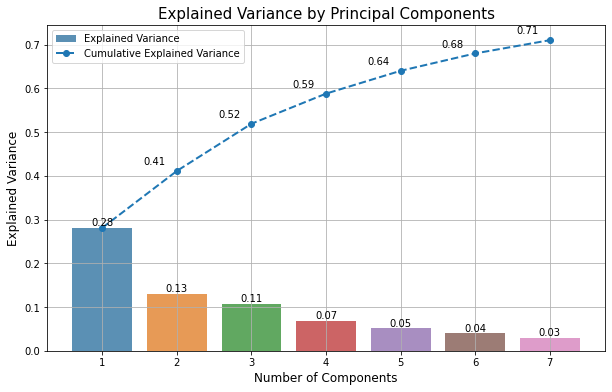

In [41]:
plt.figure(figsize=(10, 6)) 

barplot = sns.barplot(x=list(range(1, len(cumulative_var) + 1)), y=explained_var, alpha=0.8)
lineplot, = plt.plot(range(0, len(cumulative_var)), cumulative_var, marker='o', linestyle='--', linewidth=2)

plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Explained Variance', fontsize=12)
plt.title('Explained Variance by Principal Components', fontsize=15)
plt.xticks(range(0, len(cumulative_var)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])  

x_offset = -0.3
y_offset = 0.01
for i, (e_ratio, c_ratio) in enumerate(zip(explained_var, cumulative_var)):
    plt.text(i, e_ratio, f"{e_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i+x_offset, c_ratio+y_offset, f"{c_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

### 추가 문제

In [42]:
# Q. 국가별로 브랜드의 개수를 계산해봅시다. 
bonus_df.groupby('country')['brand'].nunique()

country
Czech Republic     1
France             4
Germany            6
Italy              4
Japan             11
Malaysia           1
Romania            1
South Korea        4
Spain              1
Sweden             2
United Kingdom     8
United States      5
Name: brand, dtype: int64

In [43]:
# Q. bonus_df의 각 컬럼들에 대해 상관 계수를 출력합니다.
bonus_df.corr()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
Price,1.000000,-0.500358,0.722971,-0.479424,0.113335,-0.027393
Mileage(miles),-0.500358,1.000000,-0.410781,0.316160,-0.037024,0.095271
Registration_Year,0.722971,-0.410781,1.000000,-0.501045,0.219365,0.037166
Previous Owners,-0.479424,0.316160,-0.501045,1.000000,-0.153262,-0.029338
Doors,0.113335,-0.037024,0.219365,-0.153262,1.000000,0.497160
Seats,-0.027393,0.095271,0.037166,-0.029338,0.497160,1.000000
